In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

data = pd.read_csv('diabetes.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [2]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.min()   #Glucose ~ BMI의 0 제거

Pregnancies                  0.000
Glucose                      0.000
BloodPressure                0.000
SkinThickness                0.000
Insulin                      0.000
BMI                          0.000
DiabetesPedigreeFunction     0.078
Age                         21.000
Outcome                      0.000
dtype: float64

In [4]:
zero_list = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[data[zero_list] == 0][zero_list].count()

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In [5]:
data[zero_list] = data[zero_list].replace(0, data[zero_list].mean())
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [6]:
def cla_pre(data):
    n = ''
    if data >= 10:
        n = 'lot'
    elif data >= 5:
        n = 'adequate'
    else:
        n = 'less'
    
    return n

l = []
for i in data['Pregnancies']:
    l.append(cla_pre(i))

data['cla_pree'] = l
    
data.groupby('cla_pree').count()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
cla_pree,,,,,,,,,
adequate,218,218,218,218,218,218,218,218,218
less,492,492,492,492,492,492,492,492,492
lot,58,58,58,58,58,58,58,58,58


In [7]:
data['cla_pree'] = data['Pregnancies'].apply(lambda x:cla_pre(x))
data.groupby(['cla_pree', 'Outcome']).count()   #*** 임신 횟수와 당뇨병은 비례

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  \
cla_pree Outcome                                                                
adequate 0                116      116            116            116      116   
         1                102      102            102            102      102   
less     0                356      356            356            356      356   
         1                136      136            136            136      136   
lot      0                 28       28             28             28       28   
         1                 30       30             30             30       30   

                  BMI  DiabetesPedigreeFunction  Age  
cla_pree Outcome                                      
adequate 0        116                       116  116  
         1        102                       102  102  
less     0        356                       356  356  
         1        136                       136  136  
lot      0         28                        28   28  
         1         30                        30   30

/Users/kimjoonsu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cla_pree', ylabel='Outcome'>

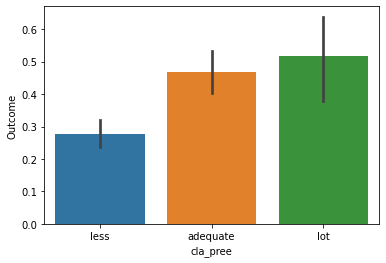

In [8]:
sns.barplot('cla_pree', 'Outcome', data = data, order = ['less', 'adequate', 'lot'])

In [9]:
data.drop('cla_pree', axis = 1, inplace = True)

In [10]:
X = data.drop('Outcome', axis = 1)
y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train, y_train)
dt_pred = clf_dt.predict(X_test)

In [30]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)

/Users/kimjoonsu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
def eval(y_test, pred):
    ac = accuracy_score(y_test, pred)
    pr = precision_score(y_test, pred)
    rc = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    cm = confusion_matrix(y_test, pred)
    
    print('<오차행렬>\n', cm)
    print('정확도: {0:.2f}, 정밀도: {1:.2f}, 재현율: {2:.2f}, F1스코어: {3:.2f}'.format(ac, pr, rc, f1))
    
eval(y_test, dt_pred)   #결과가 너무 안 좋음

<오차행렬>
 [[78 25]
 [20 31]]
정확도: 0.71, 정밀도: 0.55, 재현율: 0.61, F1스코어: 0.58


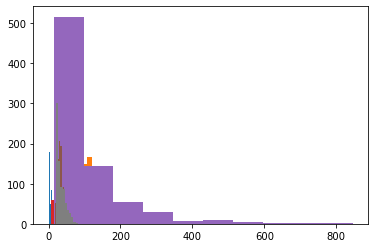

In [12]:
list = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for i in list:
    plt.hist(data[i])  #분포에는 문제가 x

In [27]:
pred_proba = clf_dt.predict_proba(X_test)[:, 1]
print(pred_proba.shape)
print(y_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba)
print('임계값 개수:', thresholds.shape)
print('임계값:', np.round(thresholds, 2))
print('정밀도:', precisions)
print('재현율:', recalls)      #*** precision_recall_curve: 결정트리에서 사용불가

(154,)
591    0
587    0
567    0
577    1
558    0
      ..
659    1
356    1
20     0
360    1
608    0
Name: Outcome, Length: 154, dtype: int64
임계값 개수: (2,)
임계값: [0. 1.]
정밀도: [0.33116883 0.55357143 1.        ]
재현율: [1.         0.60784314 0.        ]


In [28]:
def precision_recall_curve_plot(y_test=None, pred_proba_c1=None):
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()

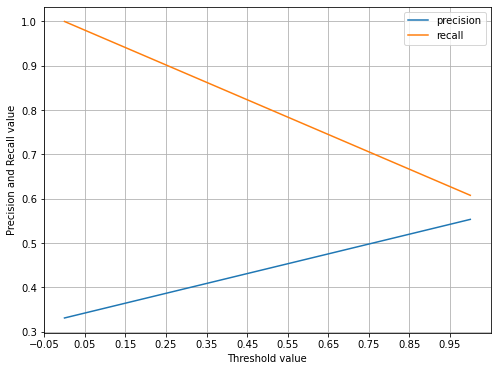

In [29]:
pred_proba_c1 = clf_dt.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(y_test, pred_proba_c1)   #*** precision_recall_curve: 결정트리에서 사용불가

In [25]:
from sklearn.preprocessing import Binarizer

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for i in thresholds:
        binarizer = Binarizer(threshold = i)
        custom_predict = binarizer.fit_transform(pred_proba_c1)
        print('임계값:', i)
        eval(y_test, custom_predict)

In [26]:
thresholds = [0.3 , 0.33 ,0.36,0.39, 0.42 , 0.45 ,0.48, 0.50]
pred_proba = clf_dt.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)    #그럼에도 만족스런 결과는 아님(교차검증 x)

임계값: 0.3
<오차행렬>
 [[78 25]
 [20 31]]
정확도: 0.71, 정밀도: 0.55, 재현율: 0.61, F1스코어: 0.58
임계값: 0.33
<오차행렬>
 [[78 25]
 [20 31]]
정확도: 0.71, 정밀도: 0.55, 재현율: 0.61, F1스코어: 0.58
임계값: 0.36
<오차행렬>
 [[78 25]
 [20 31]]
정확도: 0.71, 정밀도: 0.55, 재현율: 0.61, F1스코어: 0.58
임계값: 0.39
<오차행렬>
 [[78 25]
 [20 31]]
정확도: 0.71, 정밀도: 0.55, 재현율: 0.61, F1스코어: 0.58
임계값: 0.42
<오차행렬>
 [[78 25]
 [20 31]]
정확도: 0.71, 정밀도: 0.55, 재현율: 0.61, F1스코어: 0.58
임계값: 0.45
<오차행렬>
 [[78 25]
 [20 31]]
정확도: 0.71, 정밀도: 0.55, 재현율: 0.61, F1스코어: 0.58
임계값: 0.48
<오차행렬>
 [[78 25]
 [20 31]]
정확도: 0.71, 정밀도: 0.55, 재현율: 0.61, F1스코어: 0.58
임계값: 0.5
<오차행렬>
 [[78 25]
 [20 31]]
정확도: 0.71, 정밀도: 0.55, 재현율: 0.61, F1스코어: 0.58
